In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
losses = []

Using TensorFlow backend.


In [3]:
def loadImageFile(fileimage):
    f = open(fileimage, "rb")

    f.read(16)
    pixels = 28*28
    images_arr = []
    
    while True:
        try:
            img = []
            for j in range(pixels):
                pix = ord(f.read(1))
                img.append(pix / 255)
            images_arr.append(img)
        except:
            break

    f.close()
    image_sets = np.array(images_arr)
    return image_sets

In [4]:
def loadLabelFile(filelabel):
    f = open(filelabel, "rb")
    f.read(8)

    labels_arr = []

    while True:
        row = [0 for x in range(10)]
        try:
            label = ord(f.read(1))
            row[label] = 1
            labels_arr.append(row)
        except:
            break

    f.close()
    label_sets = np.array(labels_arr)
    return label_sets

In [5]:
train_images = loadImageFile("./data/train-images.idx3-ubyte")
train_labels = loadLabelFile("./data/train-labels.idx1-ubyte")

In [6]:
test_images = loadImageFile("./data/t10k-images.idx3-ubyte")
test_labels = loadLabelFile("./data/t10k-labels.idx1-ubyte")

In [7]:
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

y_train = train_labels
y_test = test_labels

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train,
          batch_size=100,
          epochs=10,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 102s - loss: 0.1501 - acc: 0.9539 - val_loss: 0.0436 - val_acc: 0.9865
Epoch 2/10
 - 107s - loss: 0.0406 - acc: 0.9878 - val_loss: 0.0325 - val_acc: 0.9895
Epoch 3/10
 - 117s - loss: 0.0284 - acc: 0.9911 - val_loss: 0.0214 - val_acc: 0.9930
Epoch 4/10
 - 116s - loss: 0.0210 - acc: 0.9932 - val_loss: 0.0281 - val_acc: 0.9904
Epoch 5/10
 - 107s - loss: 0.0182 - acc: 0.9945 - val_loss: 0.0254 - val_acc: 0.9915
Epoch 6/10
 - 130s - loss: 0.0142 - acc: 0.9954 - val_loss: 0.0330 - val_acc: 0.9913
Epoch 7/10
 - 128s - loss: 0.0129 - acc: 0.9956 - val_loss: 0.0265 - val_acc: 0.9938
Epoch 8/10
 - 122s - loss: 0.0127 - acc: 0.9958 - val_loss: 0.0285 - val_acc: 0.9924
Epoch 9/10
 - 114s - loss: 0.0096 - acc: 0.9969 - val_loss: 0.0242 - val_acc: 0.9933
Epoch 10/10
 - 108s - loss: 0.0087 - acc: 0.9972 - val_loss: 0.0228 - val_acc: 0.9936


In [13]:
model.save_weights("weights.h5")

In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Part 2

In [15]:
from scipy.misc import imread, imresize

In [24]:
x = imread('./test/test_3.png', mode='L')

x = imresize(x, (28, 28))

x = x.reshape(1, 28, 28, 1)

/home/xprilion/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/home/xprilion/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
out = model.predict(x)
print(out)
print(np.argmax(out, axis=1))
# convert the response to a string
response = np.argmax(out, axis=1)
print(str(response[0]))

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[3]
3


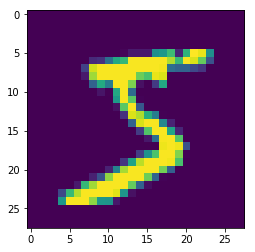

In [32]:
plt.imshow(train_images[0].reshape(28, 28), interpolation='nearest')
plt.show()